# Interpolation

Given $(n+1)$ distinct points $\{q_i\}_{i=0}^{n}$ in the interval $[0,1]$, we define the interpolation operator $\mathcal{I}^n$ the operator$$
\mathcal{I}^n : C^0([0,1]) \mapsto \mathcal{P}^n
$$which satisfies:$$
\mathcal{I}^n\:f = p, \qquad i=0,\dots,n.
$$

This operator is used to approximate the infinitely dimensional space $C^0([0,1])$ with a finite dimensional one, $\mathcal{P}^n$, which is the space of polynomials of order n+1.

### Monomial interpolation
$\mathcal{P}^n$ space has dimension $n+1$, and can be constructed using linear combinations of monomials of order $\leq n$:

$$
\mathcal{P}^n = \text{span}\{v_i := x^i\}_{i=0}^{n}.
$$

The interpolation problem is now reduce to a linear algebra problem, i.e. given $\{q_i\}_{i=0}^{n}$ interpolation points in the interval $[0,1]$ we want to find the coefficients $p^j$, with $j=0,\dots,n$ such that:

$$ f(q_i) = \sum_{j=0}^{n}p^j\:v_j(q_i) := \sum_{j=0}^{n}p^j\:V_{ij}.$$

Hence, with monomial interpolation ones obtain:

$$\mathcal{I}^n[f](x) = \sum_{j=0}^{n}V^{ij}\,f(q_i)\,v_j\,.$$

Where we have used that $V^{ij} = V_{ij}^{-1}$.

Unfortunately, this matrix can be ill-conditioned, especially when interpolation points are close together. An alternative solution is to use lagrangian interpolation which it is characterized by having the lowest condition number.

### Lagrangian interpolation
When choosing the basis of $\mathcal{P}^n$, the lagrangian basis $\{l_i(x)\}_{i=0}^{n}$ is a covinient base since is the one with the lowest condition number.

In Lagrange interpolation $\{l_i(x)\}_{i=0}^{n}$ are the Lagrange basis functions associated to $\{q_i\}^{n-1}_{i=0}$, i.e. :

$$l_i(x)  := \prod_{i \neq j, j = 0}^{n-1}\frac{x-q_j}{q_i-q_j}\,.$$

With this basis, no matrix inversion is required, and we can simply write the Lagrange interpolation as:

$$\mathcal{I}^n[f](x) := \sum_{i=0}^n f(q_i) l^n_i(x)\,.$$

# Coming next...
In what follows we will build lagrangian interpolation using equispaced points and [chebyshev points](https://en.wikipedia.org/wiki/Chebyshev_nodes). We will look at some function examples: $|x|,\sin(x)$; and the we will investigate the errors associated with different interpolation points.

In [2]:
%pylab inline
from collections import namedtuple

Populating the interactive namespace from numpy and matplotlib


Let's first define the approximation operator. For this we will use tumples imported from collections.

In [3]:
# We can use tuple for approximation
# q -> nodes
# x -> evaluation points
# M -> matrix
ApproximationOperator = namedtuple('ApproximationOperator',['q','x','M'])

We can now build the lagrangian basis functions.

In [4]:
def build_lagrangian_basis(q, x):
    """
    This function takes two 1D numpy array, q and x, and returs a matrix M
    such that M[i, j] is the evaluation of the polynomial L_i on the points 
    x_j
    """
    n_nodes = q.shape[0]
    n_evaluation_points = x.shape[0]
    
    M = zeros((n_evaluation_points, n_nodes), dtype = float64)
    
    for i in range(n_evaluation_points):
        for j in range(n_nodes):
            M[i, j] = 1
            for k in range(n_nodes):
                if k==j:
                    continue
                M[i, j] *= (x[i] - q[k])/(q[j]-q[k])
    return M

We will now construct the two types of interpolation points: equispaced (automatic with `linspace` from `numpy`), and chebyshev.

In [5]:
def build_chebyshev_nodes(n_nodes):
    """Function returns chebyshev nodes CN between -1 and 1.
       If you want from 0 and 1 then: CN(0,1) = [CN(-1,1)+1]/2"""
    return cos(((2*arange(1, n_nodes+1)-1)*pi)/float(2*n_nodes))

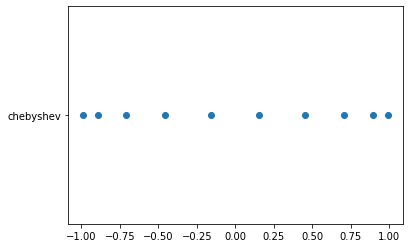

In [6]:
# Let's try out what we just did!
number_of_chebyshev_nodes = 10
plt.plot(build_chebyshev_nodes(number_of_chebyshev_nodes),zeros(number_of_chebyshev_nodes), 'o','chebyshev')
plt.show()

We will now build the two types of interpolation for different interpolation nodes, and the convergency plot for those.

In [7]:
def build_equi_space_interpolation(n_nodes, x):
    """
    Build the operator that interpolates a function on [0,1]
    using n_nodes equally space nodes.
    """
    q = linspace(0, 1, n_nodes)
    M = build_lagrangian_basis(q, x)
    return ApproximationOperator(q, x, M)

def build_chebyshev_interpolation(n_nodes, x):
    """
    Build the operator that interpolates a function on [0,1]
    using n_nodes chebyshev spaced.
    """
    q = (build_chebyshev_nodes(n_nodes)+1)*0.5
    M = build_lagrangian_basis(q, x)
    return ApproximationOperator(q, x, M)

def convergency_plot(function, build_operator, x = linspace(0,1,200)):
    """
    Convergency plot function, showing the difference from the actual
    function and the interpolated once.
    """
    errors = []
    trials = list(range(2,40))
    for n_nodes in trials:
        operator = build_operator(n_nodes, x)
        f_q = function(operator.q)
        f_x = function(x)
        I_f_x = operator.M @ f_q
        error = max(abs(f_x-I_f_x))
        errors.append(error)
    plt.semilogy(trials,errors)

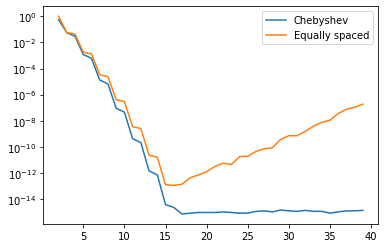

In [31]:
# Let's try out what we just did!

# Convergency plot for the two different type of nodes
convergency_plot(f1, build_chebyshev_interpolation)
convergency_plot(f1, build_equi_space_interpolation)
plt.legend(["Chebyshev", "Equally spaced"])
plt.show()

We can also build a test function to check how good the "different" interpolations are.

In [19]:
def test_interpolation_equi_space(function, n_nodes, x = np.linspace(0,1,1000)):
    operator = build_equi_space_interpolation(n_nodes, x)
    f_q = function(operator.q)
    f_x = function(x)
    I_f_x = operator.M @ f_q
    plt.plot(x, f_x, linestyle ='--', color = 'b')
    plt.plot(x, I_f_x, color = 'y')
    plt.plot(operator.q, f_q, 'o', color = 'r')
    plt.legend(["Function", "Interpolation","Nodes"])
    plt.show()
    
def test_interpolation_chebyshev(function, n_nodes, x = np.linspace(0,1,250)):
    operator = build_chebyshev_interpolation(n_nodes, x)
    f_q = function(operator.q)
    f_x = function(x)
    I_f_x = operator.M @ f_q
    plt.plot(x, f_x, linestyle ='--', color = 'b')
    plt.plot(x, I_f_x, color = 'y')
    plt.plot(operator.q, f_q, 'o', color = 'r')
    plt.legend(["Function", "Interpolation","Nodes"])
    plt.show()

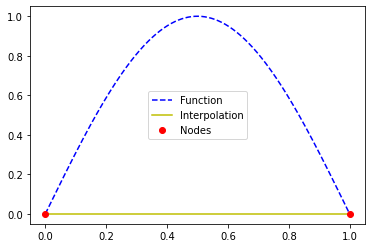

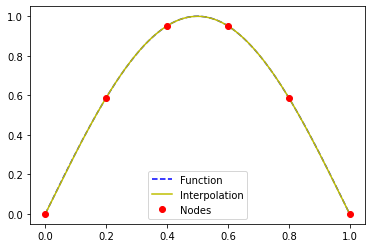

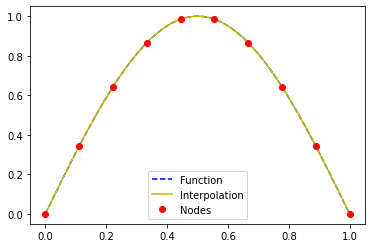

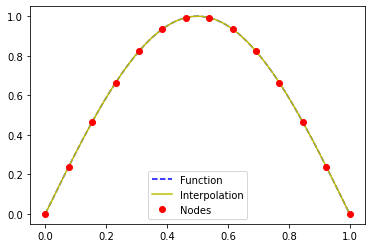

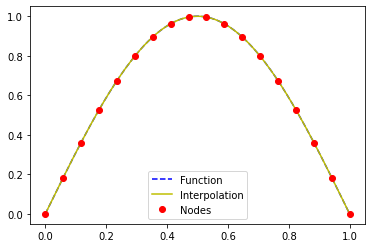

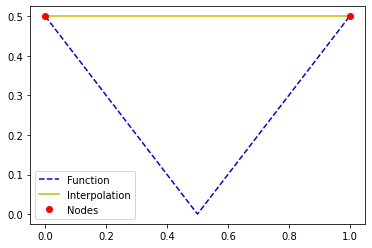

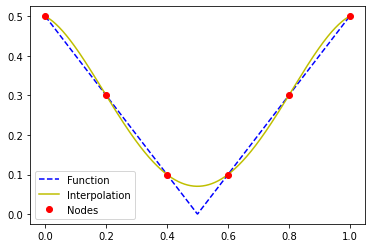

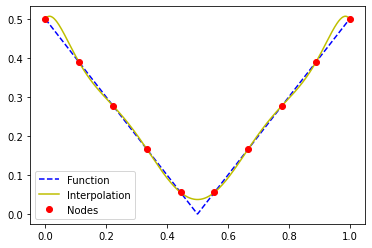

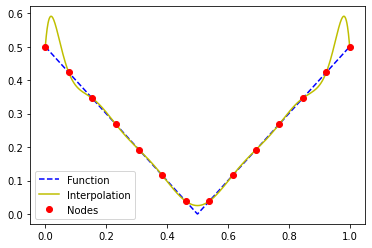

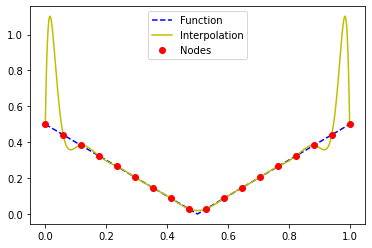

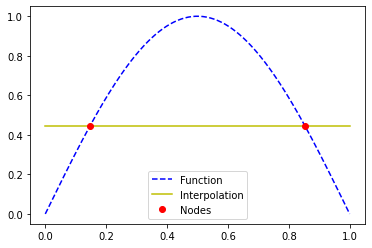

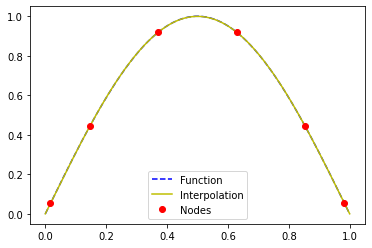

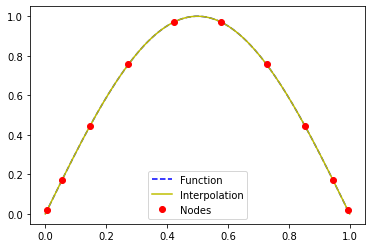

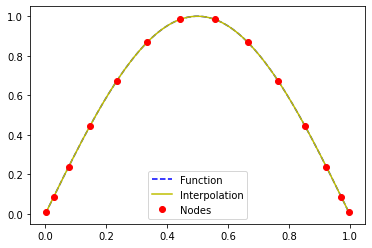

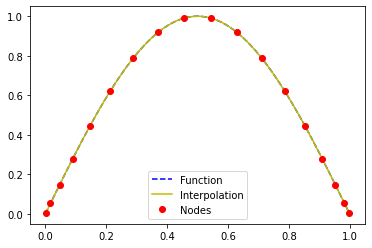

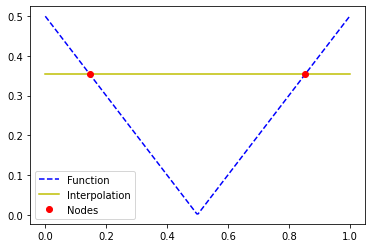

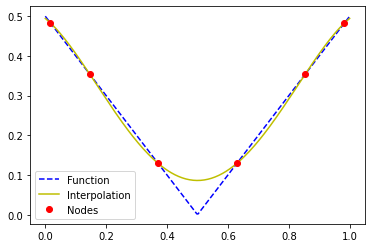

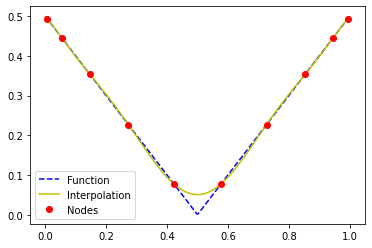

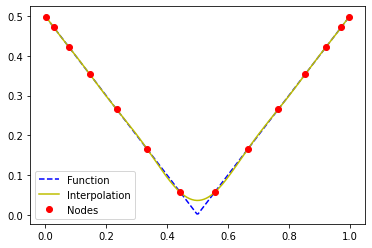

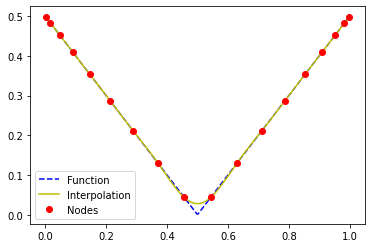

In [29]:
# Let's try out what we just did!

# 1) defining two function to test interpolation
# 2) try interpolation for different number of nodes.

#--Part 1--#
def f1(x):
    return sin(pi*x)

def f2(x):
    return abs(x-.5)

#--Part 2--#

# Plotting the results for f1 and equispaced
_=[test_interpolation_equi_space(f1, i) for i in range(2,19,4)]

# Plotting the results for f2 and equispaced
_=[test_interpolation_equi_space(f2, i) for i in range(2,19,4)]

# Plotting the results for f1 and chebyshev
_=[test_interpolation_chebyshev(f1, i) for i in range(2,19,4)]

# Plotting the results for f2 and chebyshev
_=[test_interpolation_chebyshev(f2, i) for i in range(2,19,4)]

